In [200]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [201]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv') # Убедиться в правильности пути к файлу!
dataset.head(10) # Вывод первых 10 строк

,Unnamed: 0,region,population,area,infant_mortality,gdp,literacy,arable,birthrate,deathrate
0,0,0.0,0.883442,0.949292,0.964046,0.023739,0.000000,0.431729,0.933051,0.912921
1,1,0.0,0.656108,0.716262,0.506345,0.259141,0.817639,0.575092,0.268436,0.235017
2,2,0.0,0.889605,1.000000,0.588837,0.319275,0.574146,0.213580,0.325619,0.193086
3,3,0.0,0.221784,0.344182,0.316005,0.388712,0.960595,0.390313,0.461096,0.089881
4,4,0.0,0.243741,0.408165,0.128859,0.669156,1.000000,0.174240,0.056816,0.300597
5,5,0.0,0.784469,0.998309,1.000000,0.123009,0.082472,0.182309,0.908174,1.000000
6,6,0.0,0.068555,0.294178,0.501139,0.407796,0.933985,0.447587,0.240657,0.242972
7,7,0.0,0.240601,0.404058,0.483604,0.478170,0.852430,0.532637,0.319866,0.244947
8,8,0.0,0.909869,1.000000,0.427469,0.483670,0.961918,0.435055,0.314354,0.376064
9,9,0.0,0.636624,0.718951,0.524111,0.213241,0.981686,0.523007,0.175057,0.412947


In [202]:
Xx = dataset.iloc[:, [1,*range(3,10)]]
Xx.head(10)

,region,area,infant_mortality,gdp,literacy,arable,birthrate,deathrate
0,0.0,0.949292,0.964046,0.023739,0.000000,0.431729,0.933051,0.912921
1,0.0,0.716262,0.506345,0.259141,0.817639,0.575092,0.268436,0.235017
2,0.0,1.000000,0.588837,0.319275,0.574146,0.213580,0.325619,0.193086
3,0.0,0.344182,0.316005,0.388712,0.960595,0.390313,0.461096,0.089881
4,0.0,0.408165,0.128859,0.669156,1.000000,0.174240,0.056816,0.300597
5,0.0,0.998309,1.000000,0.123009,0.082472,0.182309,0.908174,1.000000
6,0.0,0.294178,0.501139,0.407796,0.933985,0.447587,0.240657,0.242972
7,0.0,0.404058,0.483604,0.478170,0.852430,0.532637,0.319866,0.244947
8,0.0,1.000000,0.427469,0.483670,0.961918,0.435055,0.314354,0.376064
9,0.0,0.718951,0.524111,0.213241,0.981686,0.523007,0.175057,0.412947


In [203]:
X = dataset.iloc[:, [1,*range(3,10)]].values
Y = dataset['population'].values

In [204]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [205]:

input_layer_size = 8

# Количество нейронов в каждом скрытом слое и количество таких слоёв могут быть выбраны произвольно.
# Увеличение числа нейронов относительно предыдущего слоя позволяет лучше обрабатывать отдельные примеры.
# Уменьшение числа нейронов относительно предыдущего слоя позволяет обощать информацию и выводить новые правила.
# Увеличение числа слоёв помогает сети работать как более сложная функция.
first_hidden_layer_size = 6
second_hidden_layer_size = 6

# Количество нейронов в выходном слое должно быть равно количеству выходных параметров.
output_layer_size = 1

# Параметры обучения нейронной сети: количество эпох и размер батча.
epochs_number = 50
batch_size = 16

In [206]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [207]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
# Если внимательно посмотреть на количество параметров, т.е. связей между нейронами, то можно увидеть, что автоматически добавлены нейроны смещения.
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_38 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [208]:
# Настройка нейронной сети.
# Функция потерь (loss) - среднеквадратическая ошибка.
# Оптимизатор (optimizer) - adam (в настоящий момент - это стандартный оптимизатор).
# Указываем метрики средняя абсолютная ошибка (mean_absolute_error) и среднеквадратическая ошиба (mean_squared_error) для дальнейшего анализа.
model.compile(loss='mean_squared_error', optimizer='Adadelta', metrics=['mean_absolute_error', 'mean_squared_error'])

In [209]:
# Обучение нейронной сети.
# На вход передаем обучающие и тестовые выборки, количество эпох и размер батча.
# На выходе получаем объект с историей обучения, который далее будем анализировать.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 181 samples, validate on 46 samples
Epoch 1/50
181/181 [==============================] - 0s 1ms/step - loss: 0.5599 - mean_absolute_error: 0.6986 - mean_squared_error: 0.5599 - val_loss: 0.4575 - val_mean_absolute_error: 0.6319 - val_mean_squared_error: 0.4575
Epoch 2/50
181/181 [==============================] - 0s 142us/step - loss: 0.3798 - mean_absolute_error: 0.5644 - mean_squared_error: 0.3798 - val_loss: 0.3022 - val_mean_absolute_error: 0.5020 - val_mean_squared_error: 0.3022
Epoch 3/50
181/181 [==============================] - 0s 247us/step - loss: 0.2353 - mean_absolute_error: 0.4346 - mean_squared_error: 0.2353 - val_loss: 0.1660 - val_mean_absolute_error: 0.3573 - val_mean_squared_error: 0.1660
Epoch 4/50
181/181 [==============================] - 0s 174us/step - loss: 0.1129 - mean_absolute_error: 0.2895 - mean_squared_error: 0.1129 - val_loss: 0.0755 - val_mean_absolute_error: 0.2412 - val_mean_squared_error: 0.0755
Epoch 5/50
181/181 [=========================

Epoch 37/50
181/181 [==============================] - 0s 122us/step - loss: 0.0220 - mean_absolute_error: 0.1134 - mean_squared_error: 0.0220 - val_loss: 0.0182 - val_mean_absolute_error: 0.1085 - val_mean_squared_error: 0.0182
Epoch 38/50
181/181 [==============================] - 0s 133us/step - loss: 0.0217 - mean_absolute_error: 0.1133 - mean_squared_error: 0.0217 - val_loss: 0.0178 - val_mean_absolute_error: 0.1051 - val_mean_squared_error: 0.0178
Epoch 39/50
181/181 [==============================] - 0s 250us/step - loss: 0.0211 - mean_absolute_error: 0.1115 - mean_squared_error: 0.0211 - val_loss: 0.0184 - val_mean_absolute_error: 0.1121 - val_mean_squared_error: 0.0184
Epoch 40/50
181/181 [==============================] - 0s 109us/step - loss: 0.0211 - mean_absolute_error: 0.1111 - mean_squared_error: 0.0211 - val_loss: 0.0183 - val_mean_absolute_error: 0.1122 - val_mean_squared_error: 0.0183
Epoch 41/50
181/181 [==============================] - 0s 136us/step - loss: 0.0208 

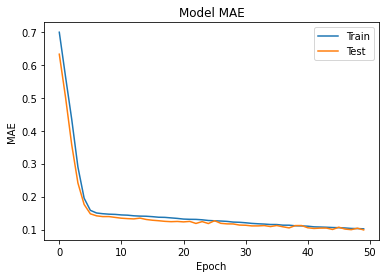

In [210]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

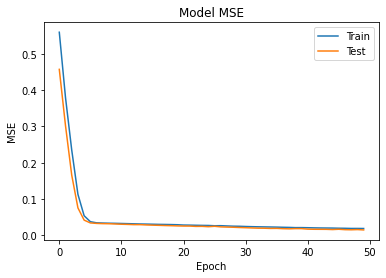

In [211]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
# Видно, что в процессе обучения сеть с каждой эпохой вычисляет всё более точные прогнозы значений Y.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [212]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

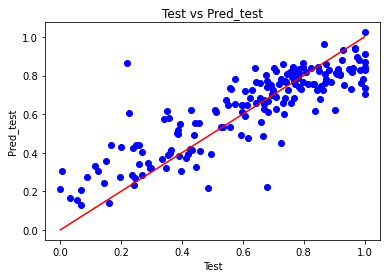

In [213]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
# В идеальной ситуации они должны совпадать, т.е. точки (Y_train[i], Y_pred_train[i]) должны лежать на прямой Y_train = Y_pred_train.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

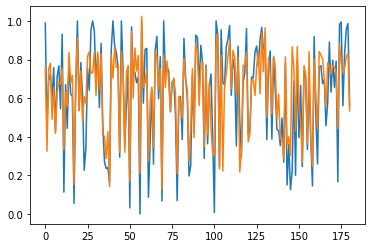

In [214]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [215]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

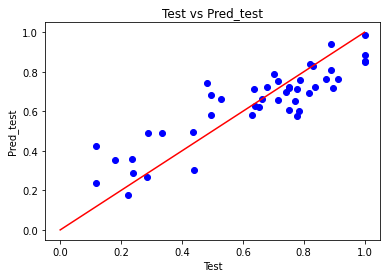

In [216]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

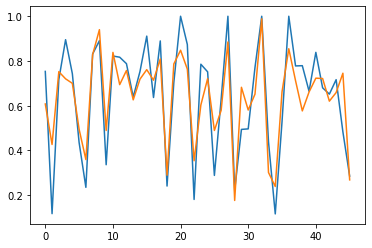

In [217]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [218]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.1347335589113342
0.12145025218415278


In [219]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)

k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9718125462532043, p = 0.0010021959897130728
Test k = 0.9645277857780457, p = 0.17175047099590302


In [220]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9782868027687073, p_s = 0.0014524416765198112
k_n = 21.399508911744515, p_n = 2.255047437002151e-05


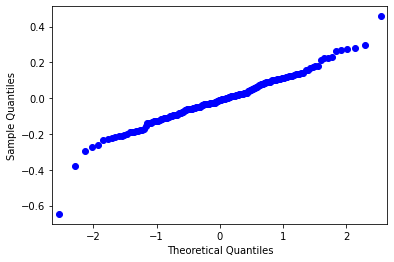

In [221]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

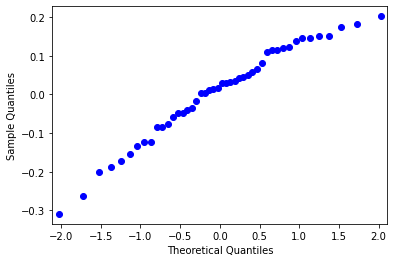

In [222]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

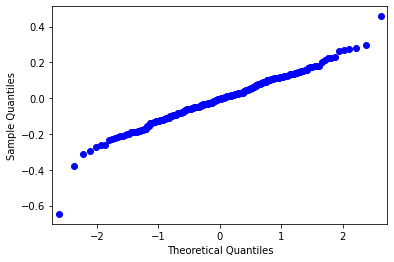

In [223]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

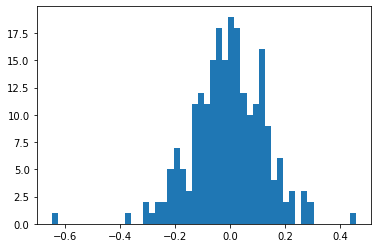

In [224]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [225]:
# Сохраним обученную нейронную сеть, название файла можно выбрать любое, расширение - h5.
model.save('SNN4.h5')